# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Jeroen Theunissen| 2002632|
|other group member's name| student number|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [28]:
min_offer = 0.0
max_offer = 10.0
offers = np.arange(min_offer,max_offer+0.1,0.1)

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [29]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [30]:
offer = {}

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [31]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
    return offer

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [33]:
delta = 0.9
print(outcome(1,0.9))
print(outcome(2,0.9))
print(outcome(3,0.9))

{2: [0, 0, 0], 1: (0.0, 10.0, 0.0), 3: (0.0, 10.0, 0.0), 4: [0, 0, 0]}
{2: (0.0, 10.0, 0.0), 1: (9.0, 1.0, 9.0), 3: [0, 0, 0], 4: [0, 0, 0]}
{2: (9.0, 1.0, 9.0), 1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002), 3: (0.0, 10.0, 0.0), 4: [0, 0, 0]}


**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

(0, 10)

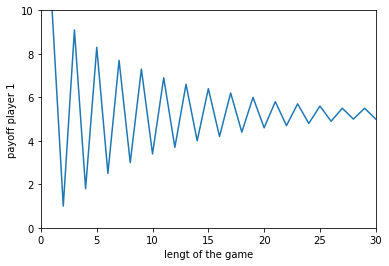

In [37]:
n=30
delta = 0.9
range_n = np.arange(1,n+1,1)
payoffplayer1 = []
for i in range_n:
    payoffplayer1.append(outcome(i,delta)[1][1])
    
plt.plot(range_n,payoffplayer1)
plt.xlabel("lengt of the game")
plt.ylabel("payoff player 1")
plt.xlim(0,30)
plt.ylim(0,10)

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

In [38]:
# Het patroon dat je ziet is dat met even aantal ronden, player 1 een lagere payoff heeft en met oneven getallen een hogere. 
# Het omgekeerde geldt voor de payoff van player 2. 
# Dit is logisch omdat degene die als laatste een voorstel mag doen alles voor zichzelf houdt.
# Je moet dus een even goed voorstel doen als wat de andere player in de laatste ronde zou krijgen, rekening houdend met dat de geldt hoeveelheid kript.